In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [116]:
# Getting data
data = pd.read_csv('DiseaseAndSymptoms.csv')

In [117]:
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# As you can see there's too many null values, and repeated values
# I don't know if it is the best way to resolve this, but I thought in transform all symptoms into true or false values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [119]:
# Here's the train split, but it's only for example. For now it will be ignored and will be rewrited in a while
x = data.drop(['Disease'], axis=1)
y = data['Disease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [120]:
# Here's an ideia of all values in the dataframe that will be converted as columns
for x in range (1,18):
    print("------------------------------------")
    print(x)
    print(data[f'Symptom_{x}'].value_counts())

------------------------------------
1
 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                       12
 pain_during_bowel_moveme

In [121]:
# # I made a funciton to transform all values into columns
# but in the end this code was wrong, I will keep it here just to show my first idea
# def add_missing_values_from_intersection(data, intersection):
    
#     return data
# def binary_columns(data):
#     alter_data = data
#     for x in range (1,18):
#         print(f"--------{x}-------")
#         # get all keys for loop
#         actual_keys = alter_data.keys()
#         # get all actual values, to see if there's symptoms that already was turned into columns
#         actual_values = alter_data[f'Symptom_{x}']
#         intersection = actual_keys.intersection(actual_values)
        
#         if intersection.any():
            
#         actual_values = actual_values.replace(intersection, None)
#         alter_data = alter_data.join(pd.get_dummies(actual_values)).drop([f'Symptom_{x}'], axis=1)
#     return alter_data

In [122]:
# alter_data = binary_columns(data)

In [123]:
# This code works, it will create the dummies of all tables but it will be with with Symptoms_x_ so we need to remove it, 
# it will also create A LOT columns so idk if it will worth if the database was bigger
df_dummies = pd.get_dummies(data.drop('Disease', axis=1))

# df_result = pd.concat([df, df_dummies], axis=1)
# df_result[['Disease',' skin_rash']] # ['Symptom_2_ skin_rash']
# basically it will get all names of the symptoms, running in a for, it will split the name into _, get the 3th part of the string and remove the spaces
prefixes = set(col.split('_', 2)[2].strip() for col in df_dummies.columns[1:])
alter_data = df_dummies
for prefix in prefixes:
    relevant_cols = [col for col in df_dummies.columns if col.endswith(prefix)]
    alter_data[prefix] = df_dummies[relevant_cols].sum(axis=1)
    
# i found this code in stack overflow too that does the same of the below 
# df = df[df.columns.drop(list(df.filter(regex='Test')))]

alter_data = alter_data.drop(columns=[col for col in df_dummies.columns if col.startswith('Symptom')])
alter_data['skin_rash']
# alter_data.merge()
#alter_data = pd.concat([alter_data, data['Disease']])
alter_data = alter_data.join(data["Disease"])
alter_data.isnull().sum().sum()

0

In [124]:
data

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
alter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, weight_gain to Disease
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [127]:
print(data.keys())

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')


In [128]:
print(alter_data.keys())

Index(['weight_gain', 'stomach_bleeding', 'mood_swings', 'watering_from_eyes',
       'continuous_feel_of_urine', 'stomach_pain', 'depression',
       'dischromic _patches', 'weight_loss', 'vomiting',
       ...
       'congestion', 'bruising', 'swelled_lymph_nodes', 'dizziness', 'anxiety',
       'prominent_veins_on_calf', 'chest_pain', 'fast_heart_rate',
       'indigestion', 'Disease'],
      dtype='object', length=132)


In [130]:
alter_data[['Disease','skin_rash']]

,Disease,skin_rash
0,Fungal infection,1
1,Fungal infection,1
2,Fungal infection,0
3,Fungal infection,1
4,Fungal infection,1
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0
4916,Acne,1
4917,Urinary tract infection,0
4918,Psoriasis,1


In [131]:
# alter_data = alter_data.drop_duplicates()

In [132]:
alter_data

,weight_gain,stomach_bleeding,mood_swings,watering_from_eyes,continuous_feel_of_urine,stomach_pain,depression,dischromic _patches,weight_loss,vomiting,...,congestion,bruising,swelled_lymph_nodes,dizziness,anxiety,prominent_veins_on_calf,chest_pain,fast_heart_rate,indigestion,Disease
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis


In [133]:
alter_data[(alter_data['Disease'] == 'Pneumonia')]

,weight_gain,stomach_bleeding,mood_swings,watering_from_eyes,continuous_feel_of_urine,stomach_pain,depression,dischromic _patches,weight_loss,vomiting,...,congestion,bruising,swelled_lymph_nodes,dizziness,anxiety,prominent_veins_on_calf,chest_pain,fast_heart_rate,indigestion,Disease
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
4783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
4824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia
4865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,Pneumonia


In [134]:
#

In [144]:
# So before create the model there's only one think to do, and it is transform the Diseases into numbers

# df.Value.apply(lambda x: np.nan if x.startswith('XXX') else x)
indexes_data = alter_data["Disease"].drop_duplicates().reset_index(drop=True)
indexes = list(range(indexes_data.notnull().sum()+1))
indexes.pop(0)
indexes_data = indexes_data.to_frame()
indexes_data.set_index('Disease')
indexes_data.insert(1,"Index", indexes)

alter_data['Disease'] = alter_data.Disease.apply(lambda x: indexes_data[indexes_data['Disease'] == x].Index.sum())
# alter_data.join(disease) alter_data['Disease']
alter_data

,weight_gain,stomach_bleeding,mood_swings,watering_from_eyes,continuous_feel_of_urine,stomach_pain,depression,dischromic _patches,weight_loss,vomiting,...,congestion,bruising,swelled_lymph_nodes,dizziness,anxiety,prominent_veins_on_calf,chest_pain,fast_heart_rate,indigestion,Disease
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,37
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,38
4917,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40


In [145]:
x = alter_data.drop(['Disease'], axis=1)
y = alter_data['Disease']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [146]:
x

,weight_gain,stomach_bleeding,mood_swings,watering_from_eyes,continuous_feel_of_urine,stomach_pain,depression,dischromic _patches,weight_loss,vomiting,...,foul_smell_of urine,congestion,bruising,swelled_lymph_nodes,dizziness,anxiety,prominent_veins_on_calf,chest_pain,fast_heart_rate,indigestion
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [154]:
train_data_predict_reg = reg.predict(x_train)
reg.score(x_test, y_test)

0.9718071816960191

In [150]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [160]:
train_data_predict_forest = forest.predict(x_train)
forest.score(x_test, y_test)

0.9996699568167837

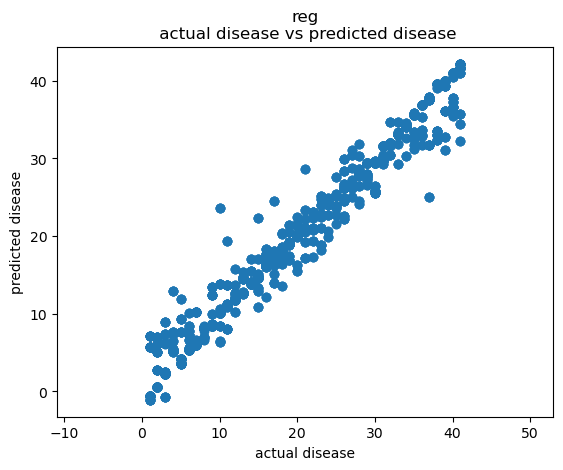

In [158]:
plt.scatter(y_train, train_data_predict_reg)
plt.xlabel("actual disease")
plt.ylabel("predicted disease")
plt.title("reg\n actual disease vs predicted disease")
plt.ticklabel_format(style='plain')
# plt.xticks(np.arange(0,1,41))
# plt.yticks(np.arange(0,1,41))
plt.axis('equal')
plt.show()

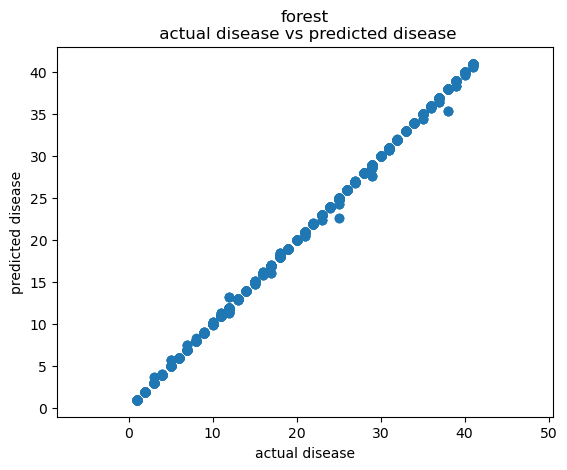

In [161]:
plt.scatter(y_train, train_data_predict_forest)
plt.xlabel("actual disease")
plt.ylabel("predicted disease")
plt.title("forest\n actual disease vs predicted disease")
plt.ticklabel_format(style='plain')
# plt.xticks(np.arange(0,1,41))
# plt.yticks(np.arange(0,1,41))
plt.axis('equal')
plt.show()